In [89]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
columns = df.columns

In [4]:
feature = df.columns[:-1]

In [5]:
target = df.columns[-1]

In [6]:
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above Analysis we can find there are no missing values in the dataset and so now we can proceed by training 
various regression models.

<h4>We should check for correlations between the features and the target and only include the features that are highly
correlated with the "quality" target variable</h4>

In [10]:
df.corrwith(df['quality'])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

Clearly many are poorly coorelated

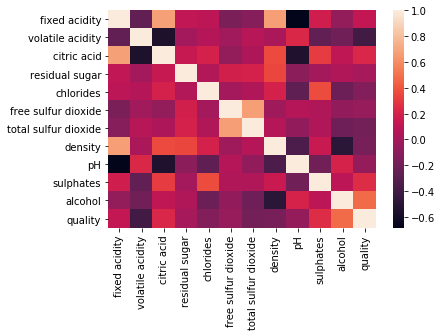

In [11]:
sns.heatmap(df.corr())

In [11]:
def find_features(feature,final):
    if(df[feature].corr(df['quality'])>0):
        final.append(feature)

In [70]:
# final = list()
# for i in range(len(X.columns)):
#     find_features(X.columns[i],final)

In [ ]:
# final

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# X_final = df.loc[:,final]

<h3>APPLYING LINEAR REGRESSION</h3>

In [13]:
model1 = LinearRegression(fit_intercept=False)
r1 = cross_validate(model1,X,y,scoring=('r2', 'neg_mean_squared_error'),cv=5)

In [14]:
print(f"Mean R-squared value for LinearRegression: {r1['test_r2'].mean()}")

Mean R-squared value for LinearRegression: 0.2909827920687206


<h4>sklearn returns negated values of scores related to errors and loss</h4>

In [15]:
print(f"Mean squared error value for LinearRegression: {r1['test_neg_mean_squared_error'].mean()}")

Mean squared error value for LinearRegression: -0.43597539850451683


<h3>Applying Polynomial Regression</h3>

In [16]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [62]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(train_X)
X_poly_test = poly_features.transform(test_X)

In [ ]:
# param_grid = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

# poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10)


In [63]:
model2 = LinearRegression(fit_intercept=False)
model2.fit(X_poly,train_y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [64]:
predict_poly = model2.predict(X_poly_test)
predict_poly = np.round(predict_poly)

In [67]:
r_poly = r2_score(test_y,predict_poly)
print(f"The r squared value for polynomial regression {r_poly}")

The r squared value for polynomial regression 0.19616998640581595


In [69]:
mse_poly = mean_squared_error(test_y,predict_poly)
print(f"The mse value for polynomial regression {mse_poly}")

The mse value for polynomial regression 0.53125


<h3>Applying Support Vector Regression</h3>

In [71]:
svm_grid = {
    'kernel':['linear','rbf'],
    'C':[100,1000],
}

# svm_grid = {
#     'kernel':['linear','poly'],
#     'degree':[2,3]
# }

model3 = GridSearchCV(svm.SVR(),svm_grid,cv=2,return_train_score=False)
model3.fit(X,y)

GridSearchCV(cv=2, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
model3.best_params_

{'C': 100, 'kernel': 'linear'}

In [73]:
params = pd.DataFrame(model3.cv_results_)
params[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,100,linear,0.280886
1,100,rbf,0.251622
2,1000,linear,-0.848631
3,1000,rbf,0.136512


In [75]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
# scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
model4 = svm.SVR(kernel='linear',C=100)
model4.fit(X_train,y_train)
predict_svm = model4.predict(X_test)

In [86]:
r_svr = r2_score(y_test,predict_svm)
print(f"The r squared value for SV regression {r_svr}")

The r squared value for SV regression 0.4019540922568676


In [87]:
mse_svr = mean_squared_error(y_test,predict_svm)
print(f"The mse value for SV regression {mse_svr}")

The mse value for SV regression 0.39082650488537773


<h3>Applying Decision Tree Regressor</h3>

In [90]:
param_tree = {
    'max_depth':[5,6,7],
    'criterion':['mse','mae'],
    'splitter':['best','random']
}

grid_tree = GridSearchCV(DecisionTreeRegressor(),param_tree,cv=5,return_train_score=False)
grid_tree.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7],
                         'splitter': ['best', 'random']},
             pre_di

In [91]:
grid_tree.best_params_

{'criterion': 'mse', 'max_depth': 5, 'splitter': 'best'}

In [92]:
tree_df = pd.DataFrame(grid_tree.cv_results_)

In [93]:
tree_df[['param_max_depth','param_criterion','param_splitter','mean_test_score']]

,param_max_depth,param_criterion,param_splitter,mean_test_score
0,5,mse,best,0.206544
1,5,mse,random,0.180798
2,6,mse,best,0.168835
3,6,mse,random,0.188946
4,7,mse,best,0.083917
5,7,mse,random,0.124113
6,5,mae,best,0.021113
7,5,mae,random,0.040466
8,6,mae,best,-0.031212
9,6,mae,random,0.049893


In [94]:
from sklearn.tree import DecisionTreeRegressor
model5 = DecisionTreeRegressor(max_depth=5,splitter='best',random_state=42)
reg_tree = model5.fit(X_train,y_train)
predict_tree = model5.predict(X_test)

In [95]:
tree_r2 = r2_score(y_test,predict_tree)
print(f"The r squared value for Decision tree regression {tree_r2}")

The r squared value for Decision tree regression 0.3366399264084673


In [97]:
tree_mse = mean_squared_error(y_test,predict_tree)
print(f"The mse value for Decision tree regression {tree_mse}")

The mse value for Decision tree regression 0.43350969496749786


In [98]:
export_graphviz(reg_tree,out_file='regressor_tree_wine.dot', feature_names = feature,
                class_names = target,
                rounded = True, proportion = False, precision = 2, filled = True)

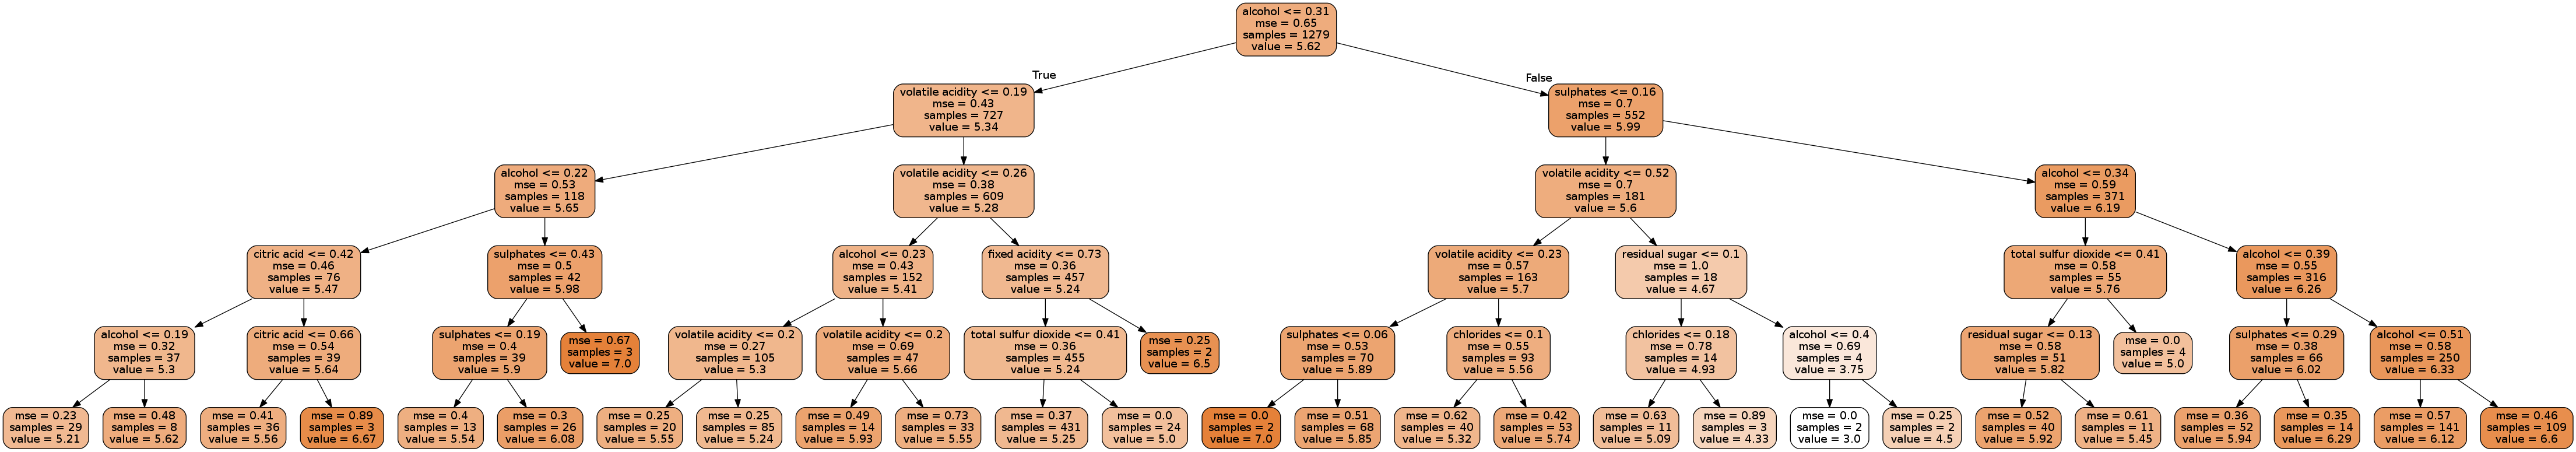

In [99]:
from IPython.display import Image
Image(filename = 'regressor_tree_wine.png', width=900,height=1000)